In [1]:
import scanpy as sc
import scvelo as scv
import loompy
import pandas as pd
import matplotlib as plt
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [3]:
#scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization

In [5]:
adata = sc.read('P1858_SP140_030_pp.h5ad', cache=True)
ldata = sc.read('possorted_genome_bam_40ALY.loom', cache=True)
adata = scv.utils.merge(adata, ldata)

In [6]:
adata

AnnData object with n_obs × n_vars = 922 × 6273
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'cell_types', 'ductal_25', 'ductal_05', 'ductal_1', 'sub_cluster_annotations', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'cell_types_colors', 'ductal_05', 'ductal_05_colors', 'ductal_1', 'ductal_1_colors', 'ductal_25', 'ductal_25_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_res0_25', 'leiden_res0_25_colors', 'leiden_res0_5', 'leiden_res0_5_colors', 'leiden_res1', 'leiden_res1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sub_cluster_annotations_colors', 'umap'
    obsm: 'X_pca

In [7]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scv.tl.recover_dynamics(adata)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

Normalized count data: spliced, unspliced.
computing neighbors


C:\Users\jenny\AppData\Local\Temp\ipykernel_1364\2115165214.py:1: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\preprocessing\moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(


    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/8 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:02:33) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [10]:
#adata.write('ipmn_pdac_dy.h5ad', compression='gzip')
#adata = sc.read('ipmn_pdac_dy.h5ad')

C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plo

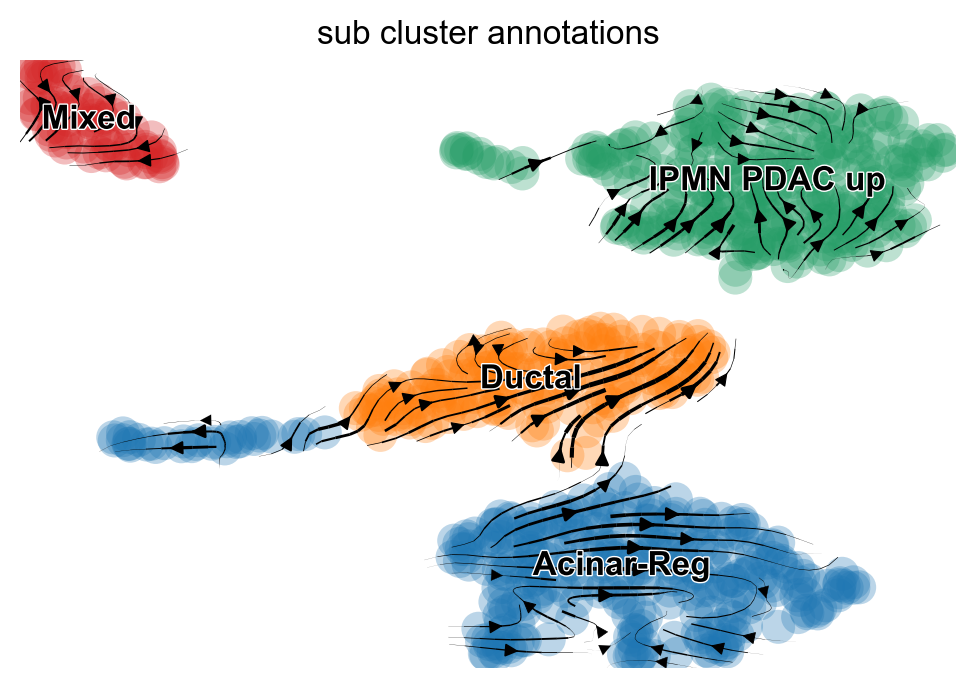

In [12]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color='sub_cluster_annotations')

# Kinetic rate parameters

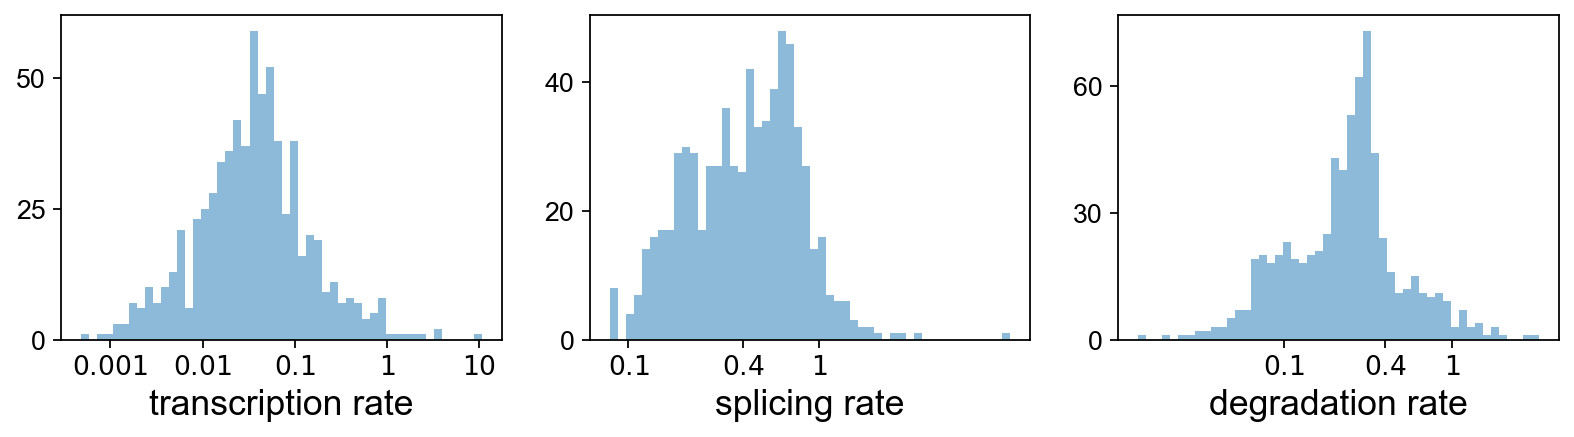

C:\Users\jenny\AppData\Local\Temp\ipykernel_1364\3438405563.py:10: DeprecationWarning: `get_df` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please `AnnData::get_df` or Scanpy's `scanpy.get.obs_df` or `scanpy.get.var_df`.
  scv.get_df(adata, 'fit*', dropna=True).head()


,fit_r2,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling
MMEL1,0.139140,0.000972,0.013109,0.005270,24.437745,17.505543,0.036071,0.003513,0.016901,0.0,0.0,0.001269,0.083291,0.017719,0.592063,7.801417
PRDM16,0.085925,0.020749,0.019131,0.176538,12.861211,17.739931,0.392221,0.031340,0.287113,0.0,0.0,0.013518,0.966584,0.071726,0.634107,4.176764
AJAP1,0.623248,0.035237,0.093088,0.318658,9.506029,6.469645,0.142875,0.029813,0.248664,0.0,0.0,0.370169,0.287149,0.081864,0.499849,2.017450
PDPN,0.377326,0.057698,0.213360,0.317414,7.733914,2.355914,0.072732,0.052637,0.225126,0.0,0.0,0.169283,0.161297,0.103661,0.660287,3.391976
TMEM51-AS1,0.167135,0.020957,0.111976,0.103980,21.472939,1.662586,0.051015,0.039378,0.295540,0.0,0.0,0.173384,0.112468,0.126237,0.434414,6.893338


In [13]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata, 'fit*', dropna=True).head()

# Latent time

computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plo

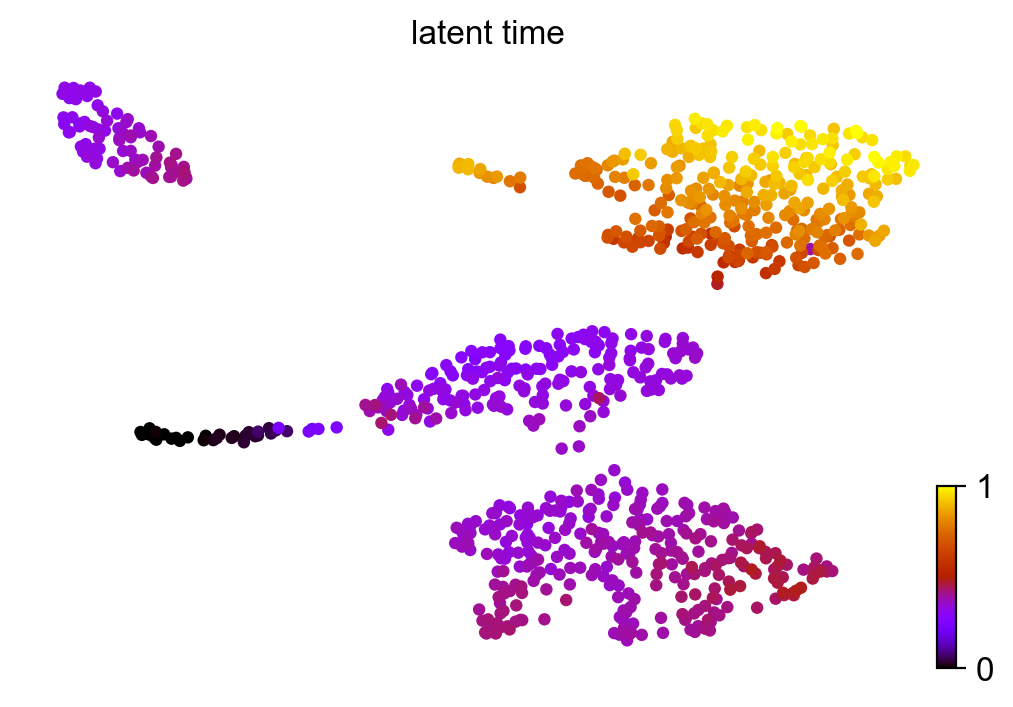

In [14]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


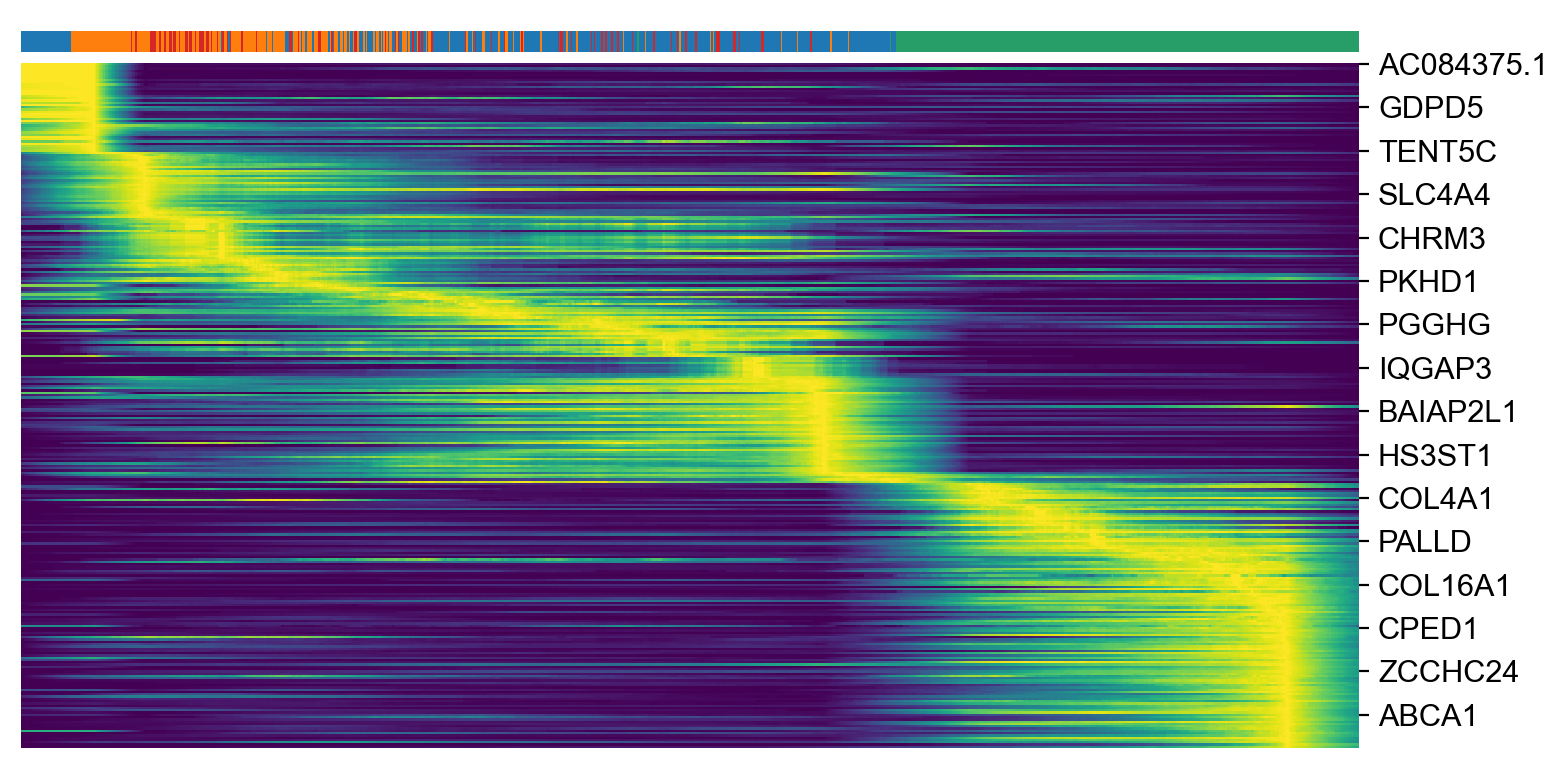

In [16]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='sub_cluster_annotations', n_convolve=100)

# Top likelihood genes

C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\jenny\anaconda3\envs\scvelo_test\lib\site-packages\scvelo\plo

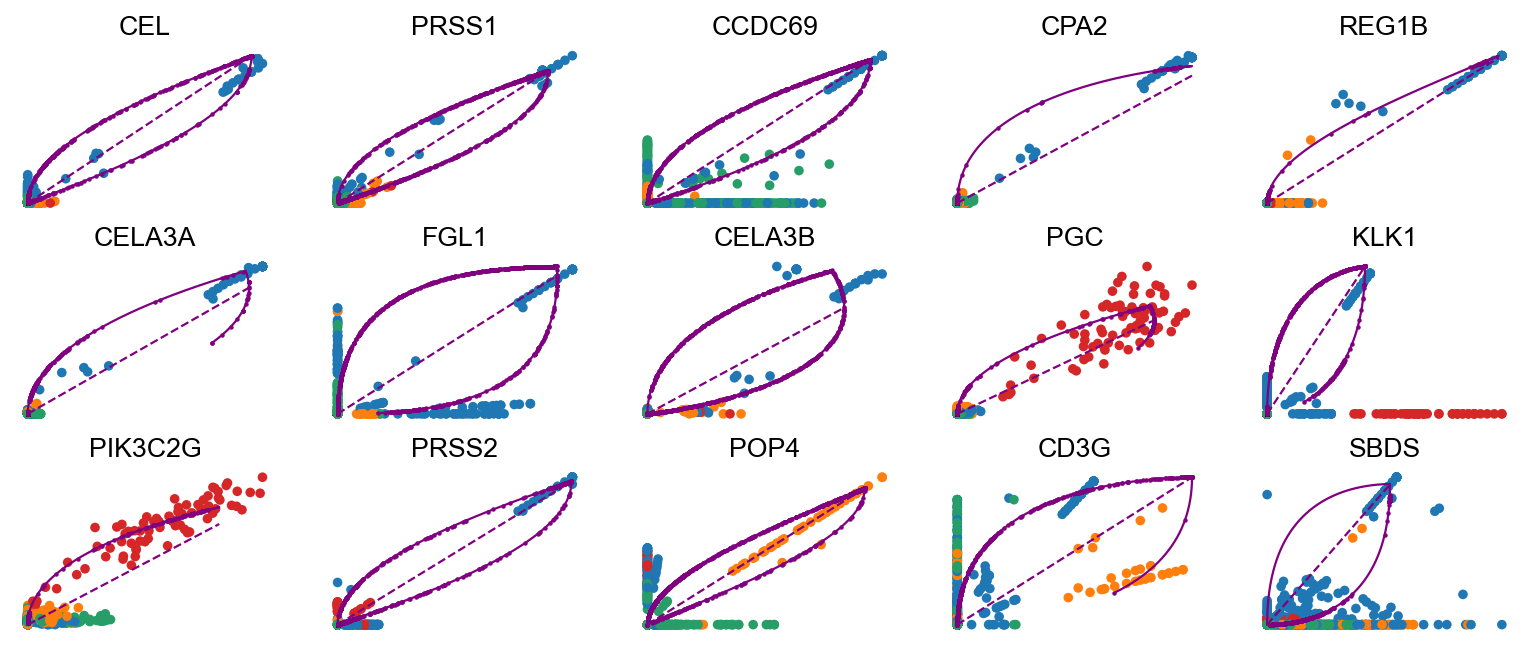

In [18]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False, color='sub_cluster_annotations')